In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load the dataset
column_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
data = pd.read_csv('/content/drive/MyDrive/Dataset/Feature_Selection/diabetes (1).csv', names=column_names, header=0)
# Added header=0 to explicitly specify the first row as the header

# Display the first few rows of the dataset
data.head()

# Calculate the correlation matrix
corr_matrix = data.corr()
print(corr_matrix['Outcome'])

Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64


In [ ]:
# Split the data into features and target
X = data[['Glucose']]
y = data['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# predictions and evaluation
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

print("Coefficient for number of pregnancies:", model.coef_)

              precision    recall  f1-score   support

           0       0.63      0.81      0.71        99
           1       0.30      0.15      0.20        55

    accuracy                           0.57       154
   macro avg       0.46      0.48      0.45       154
weighted avg       0.51      0.57      0.52       154

Coefficient for number of pregnancies: [[0.05138516]]


In [ ]:
# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the model:", accuracy)

Accuracy of the model: 0.5714285714285714


<Axes: >

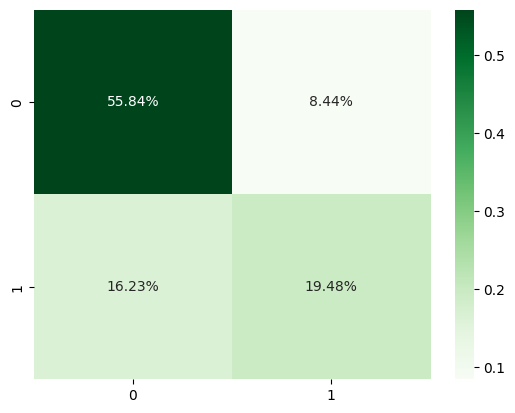

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

cf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,
            fmt='.2%', cmap='Greens')